<a href="https://colab.research.google.com/github/Klaucris/Klaucris/blob/main/Tabela1_IBGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

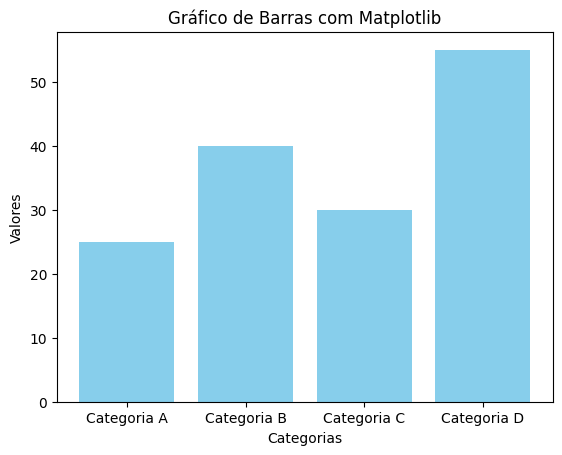

In [ ]:

import matplotlib.pyplot as plt

# Dados de exemplo
categorias = ['Categoria A', 'Categoria B', 'Categoria C', 'Categoria D']
valores = [25, 40, 30, 55]

# Criar o gráfico de barras
plt.bar(categorias, valores, color='skyblue')

# Adicionar títulos e rótulos
plt.title('Gráfico de Barras com Matplotlib')
plt.xlabel('Categorias')
plt.ylabel('Valores')

# Mostrar o gráfico
plt.show()

/tmp/ipython-input-4210616206.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categorias', y='Valores', data=dados, palette='viridis')


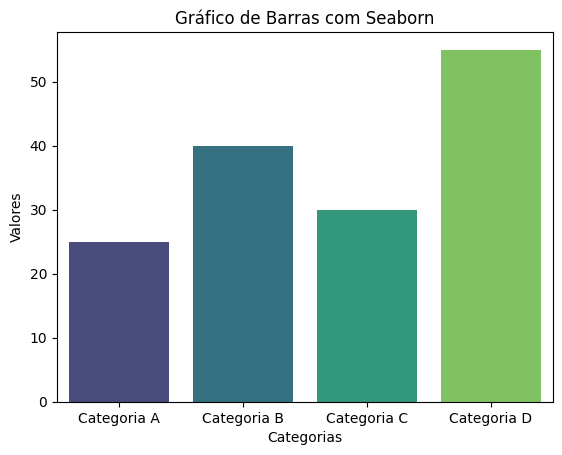

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Criar um DataFrame com os dados
dados = pd.DataFrame({
    'Categorias': ['Categoria A', 'Categoria B', 'Categoria C', 'Categoria D'],
    'Valores': [25, 40, 30, 55]
})

# Criar o gráfico de barras
sns.barplot(x='Categorias', y='Valores', data=dados, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Gráfico de Barras com Seaborn')
plt.xlabel('Categorias')
plt.ylabel('Valores')

# Mostrar o gráfico
plt.show()

In [ ]:

import plotly.express as px
import pandas as pd

# Criar um DataFrame com os dados
dados = pd.DataFrame({
    'Categorias': ['Categoria A', 'Categoria B', 'Categoria C', 'Categoria D'],
    'Valores': [25, 40, 30, 55]
})

# Criar o gráfico de barras interativo
fig = px.bar(dados, x='Categorias', y='Valores', title='Gráfico de Barras com Plotly Express')

# Mostrar o gráfico
fig.show()

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Se você usou o upload direto
# df = pd.read_csv('PDA_IBGE.csv')

# Se você carregou do Google Drive, ajuste o caminho
try:
    df = pd.read_csv('/content/PDA_IBGE.csv', encoding='latin-1', sep=';')
except UnicodeDecodeError:
    print("Could not decode with latin-1, trying ISO-8859-1")
    df = pd.read_csv('/content/PDA_IBGE.csv', encoding='ISO-8859-1', sep=';')


# Exibir as primeiras linhas para verificar se deu certo
print(df.head())

         PLANO DE DADOS ABERTOS 2022-2024            Unnamed: 1  \
0          Dados Acadêmicos:  Disciplinas                   NaN   
1                            Departamento  Código da Disciplina   
2  COORDENAÇÃO DE REGISTRO ACADÊMICO - AX             4EDI.0100   
3  COORDENAÇÃO DE REGISTRO ACADÊMICO - AX              4EDI.033   
4  COORDENAÇÃO DE REGISTRO ACADÊMICO - AX              4EDI.043   

                           Unnamed: 2         Unnamed: 3  \
0                                 NaN                NaN   
1             Descrição da Disciplina    Nível de Ensino   
2  LEGISLAÇÃO E SEGURANÇA DO TRABALHO  TÉCNICO INTEGRADO   
3                          TOPOGRAFIA  TÉCNICO INTEGRADO   
4        TECNOLOGIA DAS CONSTRUÇÕES I  TÉCNICO INTEGRADO   

                                          Unnamed: 4      Unnamed: 5  \
0                                                NaN             NaN   
1                                           Curso(s)  Carga Horária    
2  TÉCNICO DE NÍVEL 

In [ ]:

# Ver as colunas disponíveis para escolher
print(df.columns)

Index(['PLANO DE DADOS ABERTOS 2022-2024', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')


Columns after renaming: Index(['Departamento', 'Código da Disciplina', 'Disciplina', 'Nível de Ensino',
       'Curso(s)', 'Carga Horária ', 'Teórica/Prática', 'Cód. Pré-Requisitos',
       'Cód. Co-Requisitos', 'Data'],
      dtype='object', name=1)


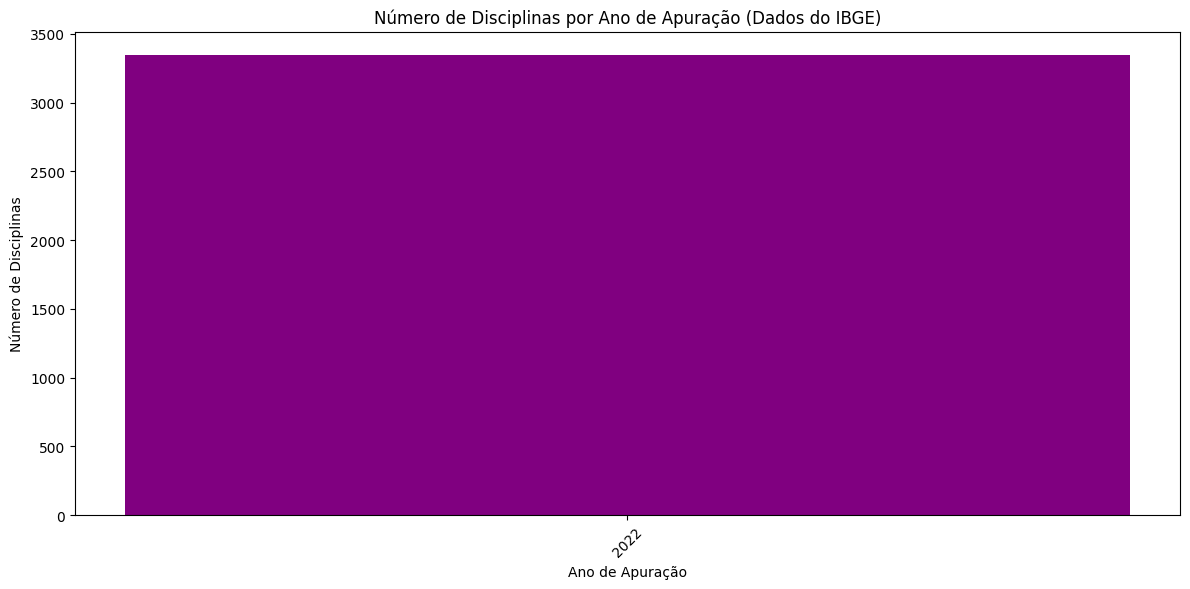

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is already loaded from the previous steps

# Clean the 'Unnamed: 2' column to remove header rows
df_cleaned = df.iloc[2:].copy() # Start from the 3rd row (index 2) to skip headers

# Rename columns for clarity (optional, but good practice)
df_cleaned.columns = df.iloc[1]
df_cleaned = df_cleaned.rename(columns={'Descrição da Disciplina': 'Disciplina', 'Data da Apuração ': 'Data'}) # Corrected column name with trailing space

# Print columns to debug
print("Columns after renaming:", df_cleaned.columns)

# Convert the 'Data' column to datetime objects, coercing errors
df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'], errors='coerce', format='%d/%m/%y')

# Drop rows where 'Data' could not be parsed
df_cleaned.dropna(subset=['Data'], inplace=True)

# Extract the year
df_cleaned['Ano'] = df_cleaned['Data'].dt.year

# Count the occurrences of each year
contagem_por_ano = df_cleaned['Ano'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(contagem_por_ano.index.astype(str), contagem_por_ano.values, color='purple')

# Adicionar títulos e rótulos
plt.title('Número de Disciplinas por Ano de Apuração (Dados do IBGE)')
plt.xlabel('Ano de Apuração')
plt.ylabel('Número de Disciplinas')
plt.xticks(rotation=45) # Optional: rotate x-axis labels for better readability

# Mostrar o gráfico
plt.tight_layout()
plt.show()

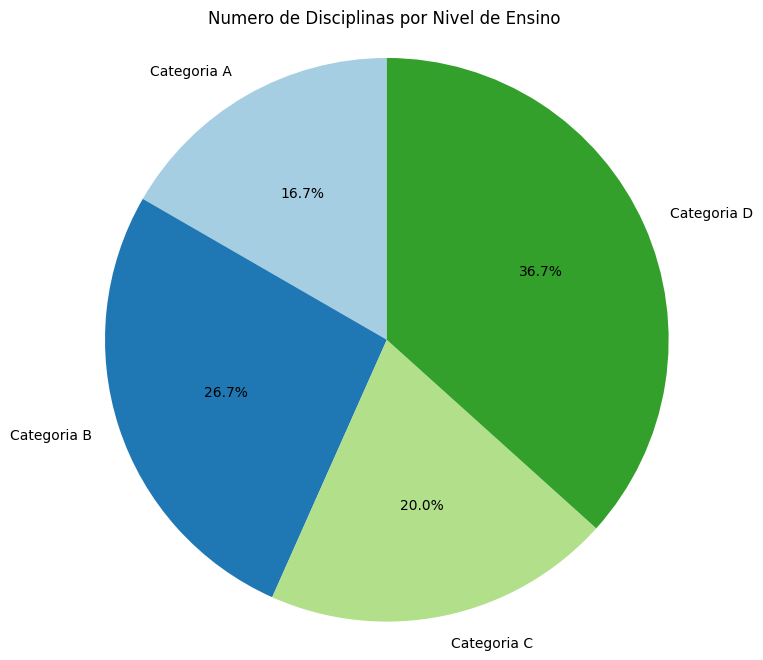

In [ ]:

# 2. Criar o gráfico de pizza
plt.figure(figsize=(8, 8)) # Ajusta o tamanho do gráfico para ficar circular
plt.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adicionar um título
plt.title('Numero de Disciplinas por Nivel de Ensino ')

# Garantir que o círculo não seja distorcido
plt.axis('equal')

# 3. Mostrar o gráfico
plt.show()

/tmp/ipython-input-3933331628.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




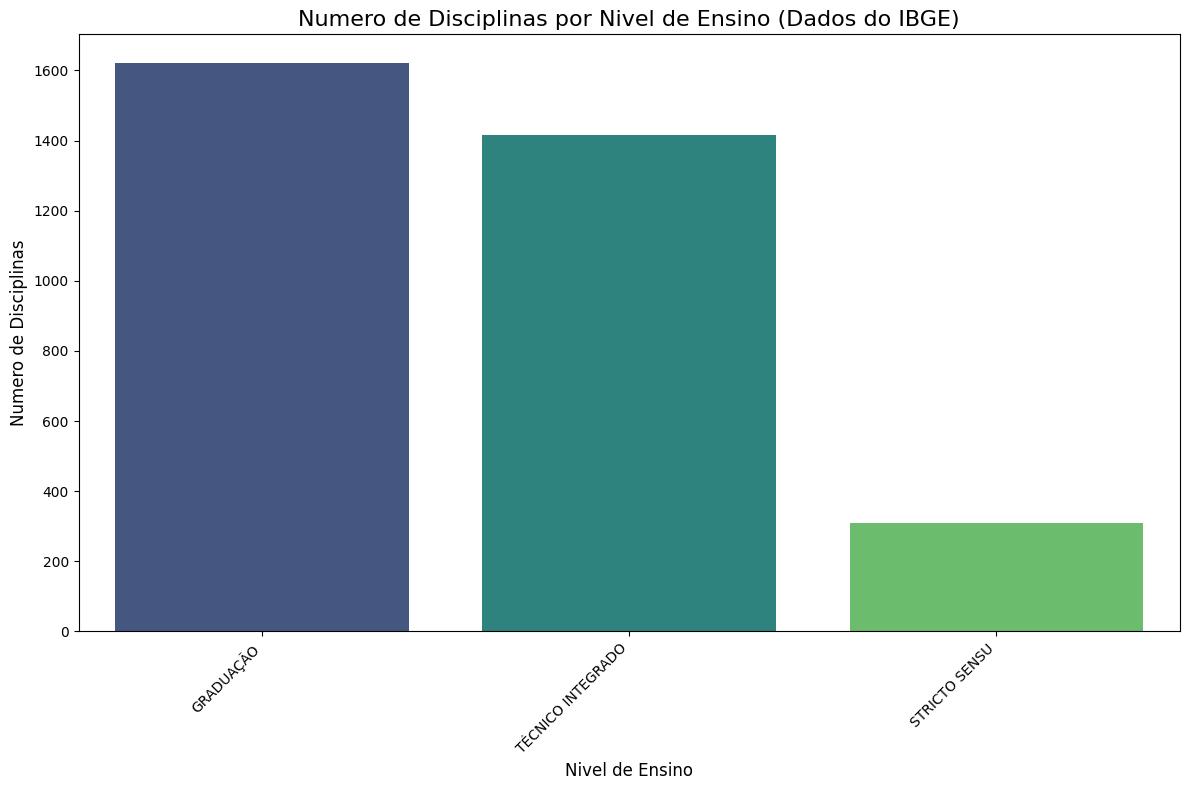

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is already loaded from the previous steps

# Clean the data and create df_cleaned
df_cleaned = df.iloc[2:].copy()
new_columns = df.iloc[1]
df_cleaned.columns = new_columns
df_cleaned = df_cleaned.rename(columns={'Descrição da Disciplina': 'Disciplina', 'Data da Apuração ': 'Data', 'Nível de Ensino': 'Nível de Ensino'})

# Count the occurrences of each level of education
contagem_por_nivel = df_cleaned['Nível de Ensino'].value_counts()

# Create a bar plot using the counts per level of education
plt.figure(figsize=(12, 8)) # Ajusta o tamanho do gráfico
sns.barplot(x=contagem_por_nivel.index, y=contagem_por_nivel.values, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Numero de Disciplinas por Nivel de Ensino (Dados do IBGE)', fontsize=16)
plt.xlabel('Nivel de Ensino', fontsize=12)
plt.ylabel('Numero de Disciplinas', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Mostrar o gráfico
plt.tight_layout()
plt.show()

/tmp/ipython-input-3104176457.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




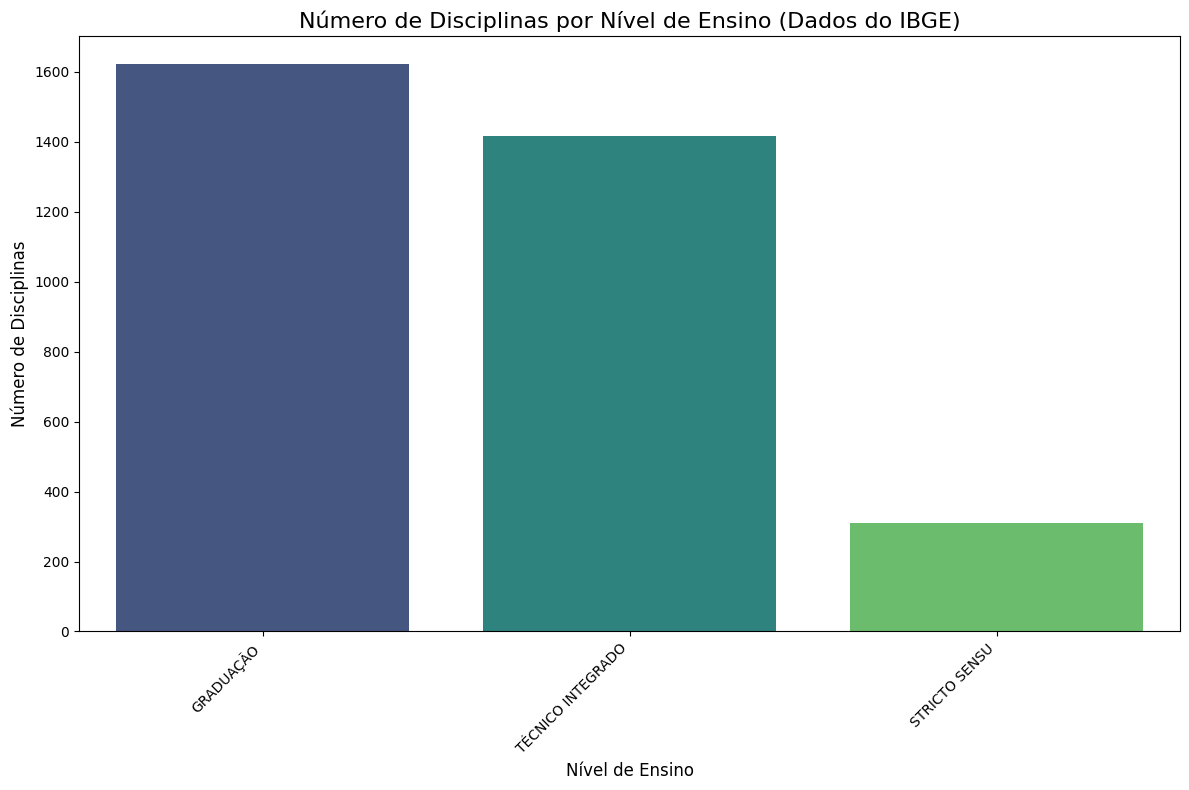

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_cleaned is already available and processed from previous steps

# Count the occurrences of each level of education
contagem_por_nivel = df_cleaned['Nível de Ensino'].value_counts()

# 1. Ordenar os níveis de ensino pela contagem em ordem decrescente
contagem_ordenada = contagem_por_nivel.sort_values(ascending=False)

# 2. Criar o gráfico de barras com os dados ordenados
plt.figure(figsize=(12, 8))
sns.barplot(x=contagem_ordenada.index, y=contagem_ordenada.values, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Número de Disciplinas por Nível de Ensino (Dados do IBGE)', fontsize=16)
plt.xlabel('Nível de Ensino', fontsize=12)
plt.ylabel('Número de Disciplinas', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Mostrar o gráfico
plt.tight_layout()
plt.show()

/tmp/ipython-input-1236176258.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




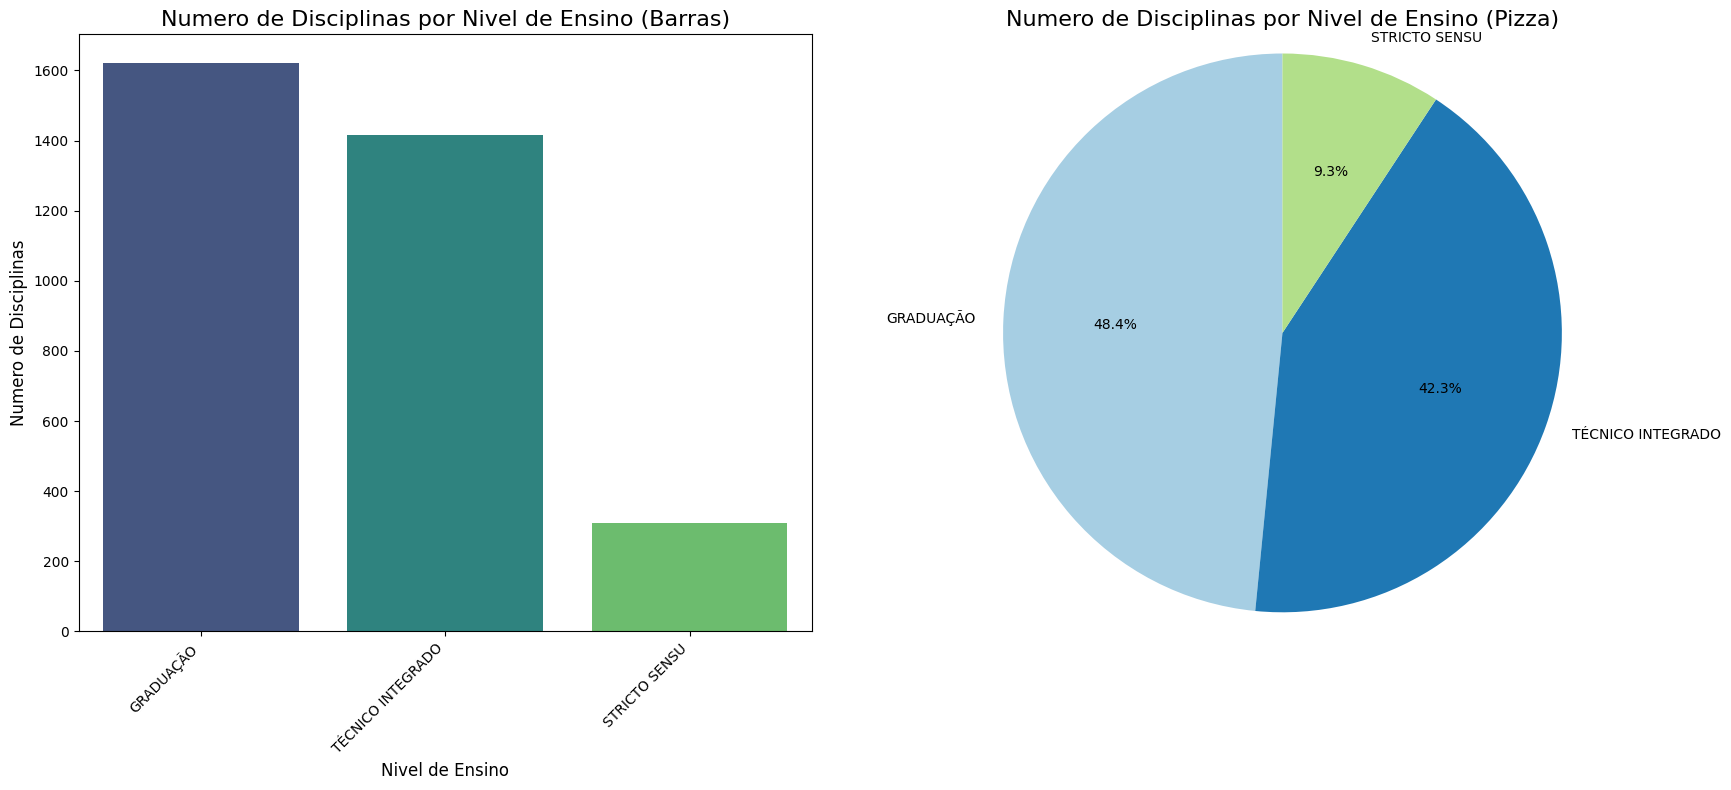

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_cleaned is already available and processed from previous steps

# Count the occurrences of each level of education
contagem_por_nivel = df_cleaned['Nível de Ensino'].value_counts()

# 1. Preparar os dados para o dashboard - use the count of levels
labels = contagem_por_nivel.index
valores = contagem_por_nivel.values

# 2. Criar a estrutura do dashboard (dois gráficos lado a lado)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8)) # 1 linha, 2 colunas

# 3. Gráfico 1: Barras Horizontais (Eixo esquerdo) - using the level counts
sns.barplot(
    x=labels,
    y=valores,
    palette='viridis',
    ax=ax1
)
ax1.set_title('Numero de Disciplinas por Nivel de Ensino (Barras)', fontsize=16)
ax1.set_xlabel('Nivel de Ensino', fontsize=12)
ax1.set_ylabel('Numero de Disciplinas', fontsize=12)
plt.sca(ax1) # Set the current axes to ax1
plt.xticks(rotation=45, ha='right')


# 4. Gráfico 2: Pizza (Eixo direito) - using the level counts
ax2.pie(
    valores,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
ax2.set_title('Numero de Disciplinas por Nivel de Ensino (Pizza)', fontsize=16)
ax2.axis('equal') # Garante que o gráfico de pizza seja circular

# 5. Ajustar o layout e mostrar o dashboard
plt.tight_layout()
plt.show()